Attempt at finding clusters in the events of GENIE16_CH datasets

In [7]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import mhn_tools as mytools
import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

We have prepared two analysis of G16_CH-datasets and an additional option that is used to justify our normalization (multiplication by $\frac{1}{|T|}$) .

Select the desired option by setting *dat_index* to 'LUAD','COAD' or 'AVG_NORM_ANALYSIS'

In [8]:
np.random.seed(999)

file_names_dict={'LUAD':                    "G16_CH_LUAD_Events.csv", 
                 'COAD':                    "G16_CH_COAD_Events.csv", 
                 'AVG_NORM_ANALYSIS':       "G16_CH_LUAD_Events.csv"}
dat_index='LUAD'
file_path=os.path.join( os.getcwd(), '..','data', file_names_dict[dat_index] )
raw_data_input = pd.read_csv(file_path)
data_input=raw_data_input.loc[:, raw_data_input.columns.str.endswith(')')]  #select all columns ending in '(M)','(Amp) or (Del)
events=list(data_input.columns)
events_abc=events.copy()
events_abc.sort()


Analyse dataset for test events chosen by biologically related functions

<>:42: SyntaxWarning: invalid escape sequence '\{'
<>:42: SyntaxWarning: invalid escape sequence '\}'
<>:42: SyntaxWarning: invalid escape sequence '\{'
<>:42: SyntaxWarning: invalid escape sequence '\}'
C:\Users\michi\AppData\Local\Temp\ipykernel_53212\2588975643.py:42: SyntaxWarning: invalid escape sequence '\{'
  print("\{\\text{"+', '.join(tes)+"}\}")
C:\Users\michi\AppData\Local\Temp\ipykernel_53212\2588975643.py:42: SyntaxWarning: invalid escape sequence '\}'
  print("\{\\text{"+', '.join(tes)+"}\}")


\{\text{TP53 (M), RB1 (M), RB1/13q (Del)}\}
\{\text{EGFR (M), MET (M), KRAS (M), BRAF (M)}\}
\{\text{STK11 (M), KEAP1 (M)}\}
\{\text{FAT1 (M), APC (M)}\}
Directory for storage is edm_fd259c6e5c644/TP53M_RB1M_RB113qDel
check if mbonart_checkpoints/edm_fd259c6e5c644/TP53M_RB1M_RB113qDel   does exist
Directory for storage is edm_fd259c6e5c644/EGFRM_METM_KRASM_BRAFM
check if mbonart_checkpoints/edm_fd259c6e5c644/EGFRM_METM_KRASM_BRAFM   does exist
Directory for storage is edm_fd259c6e5c644/STK11M_KEAP1M
check if mbonart_checkpoints/edm_fd259c6e5c644/STK11M_KEAP1M   does exist
Directory for storage is edm_fd259c6e5c644/FAT1M_APCM
check if mbonart_checkpoints/edm_fd259c6e5c644/FAT1M_APCM   does exist


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


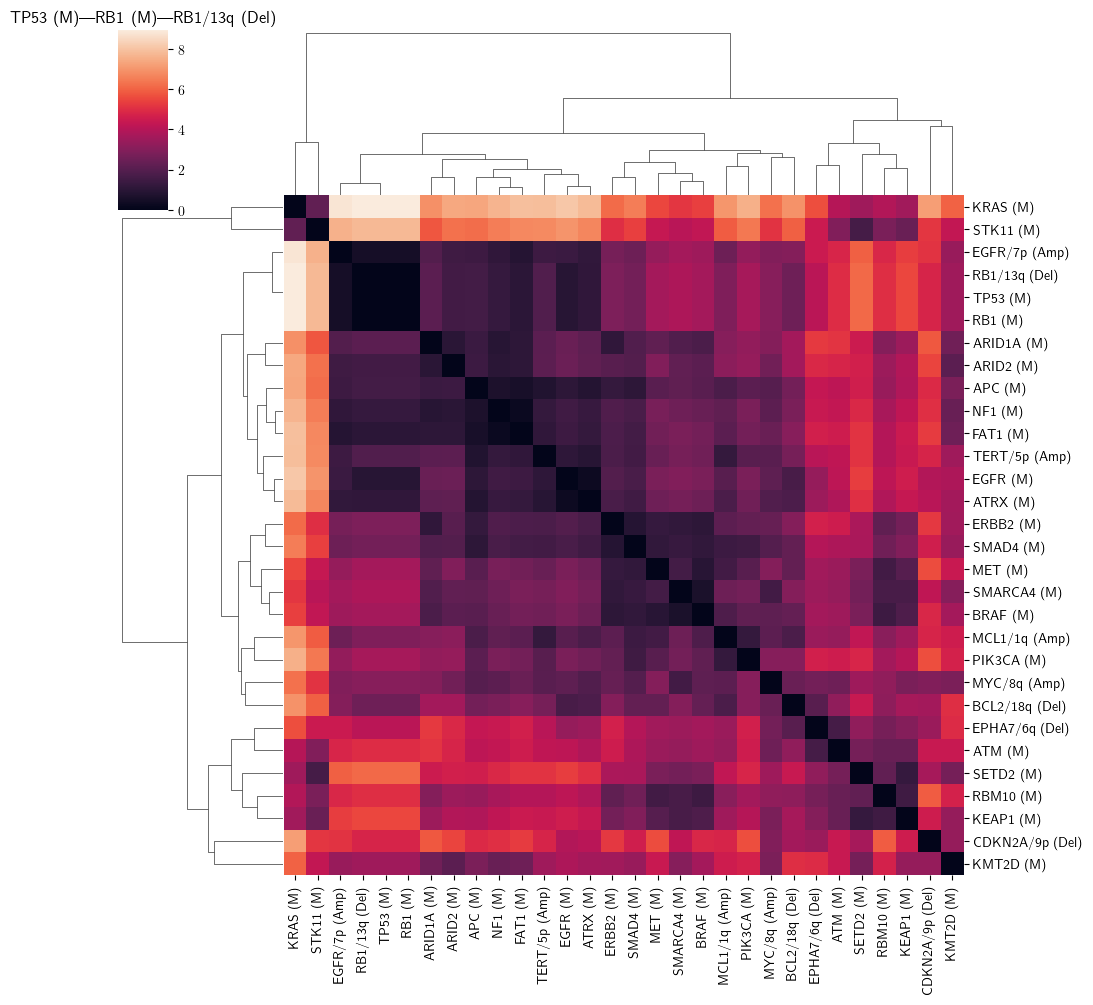

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


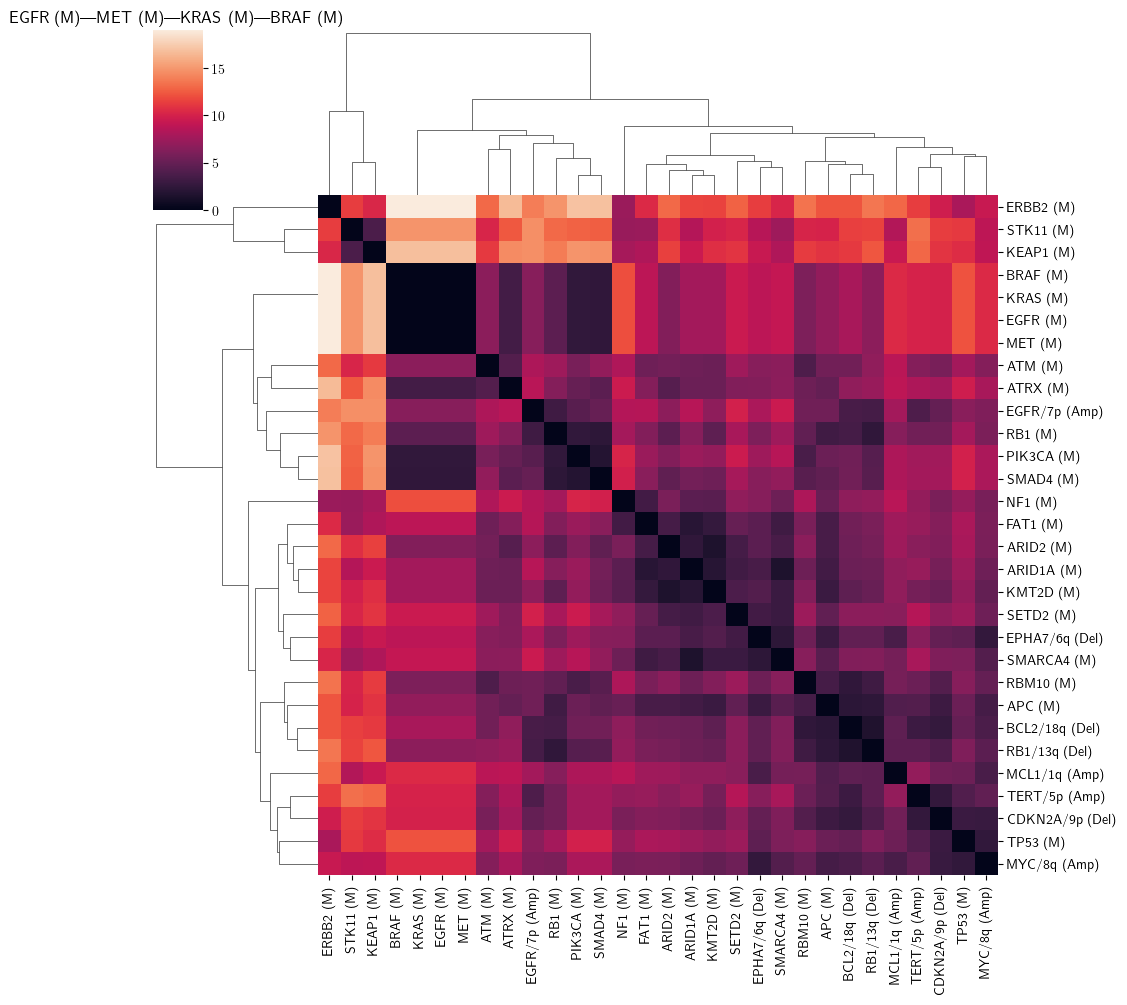

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


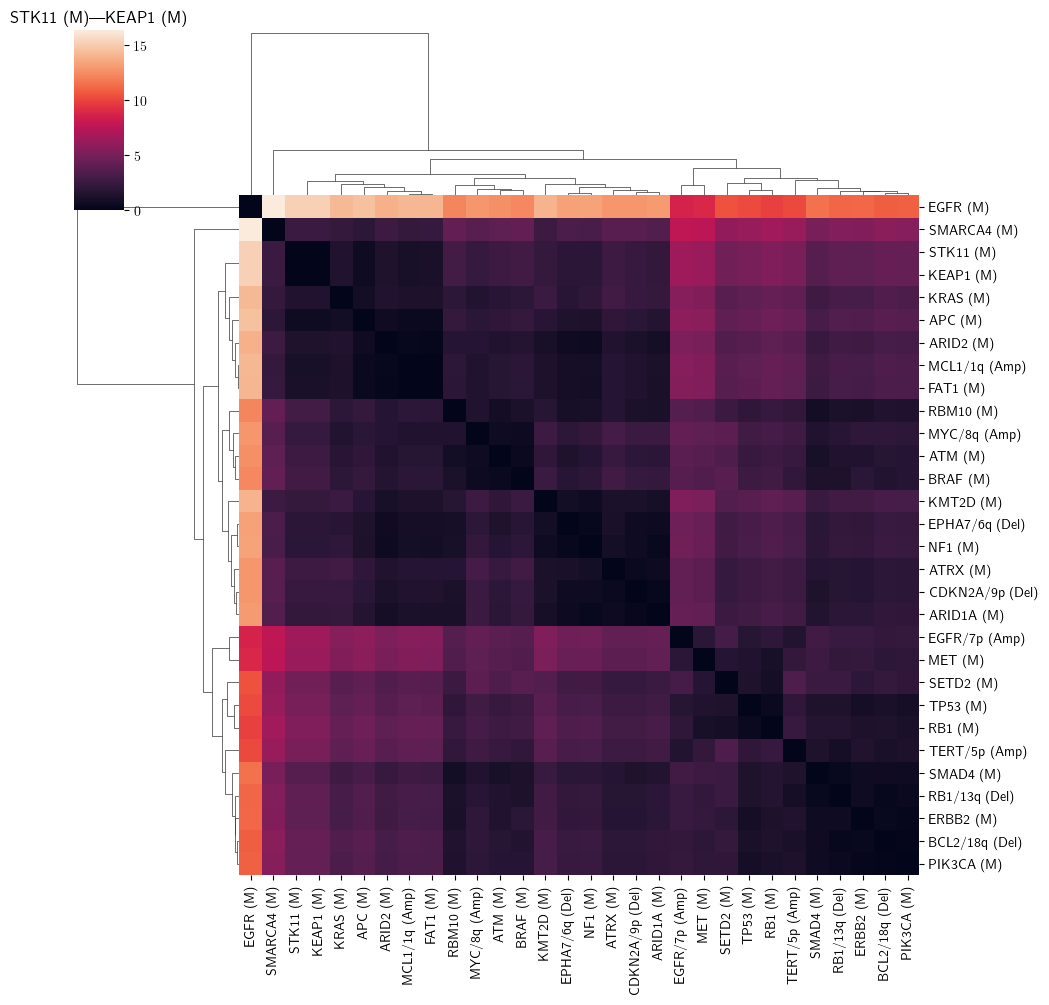

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


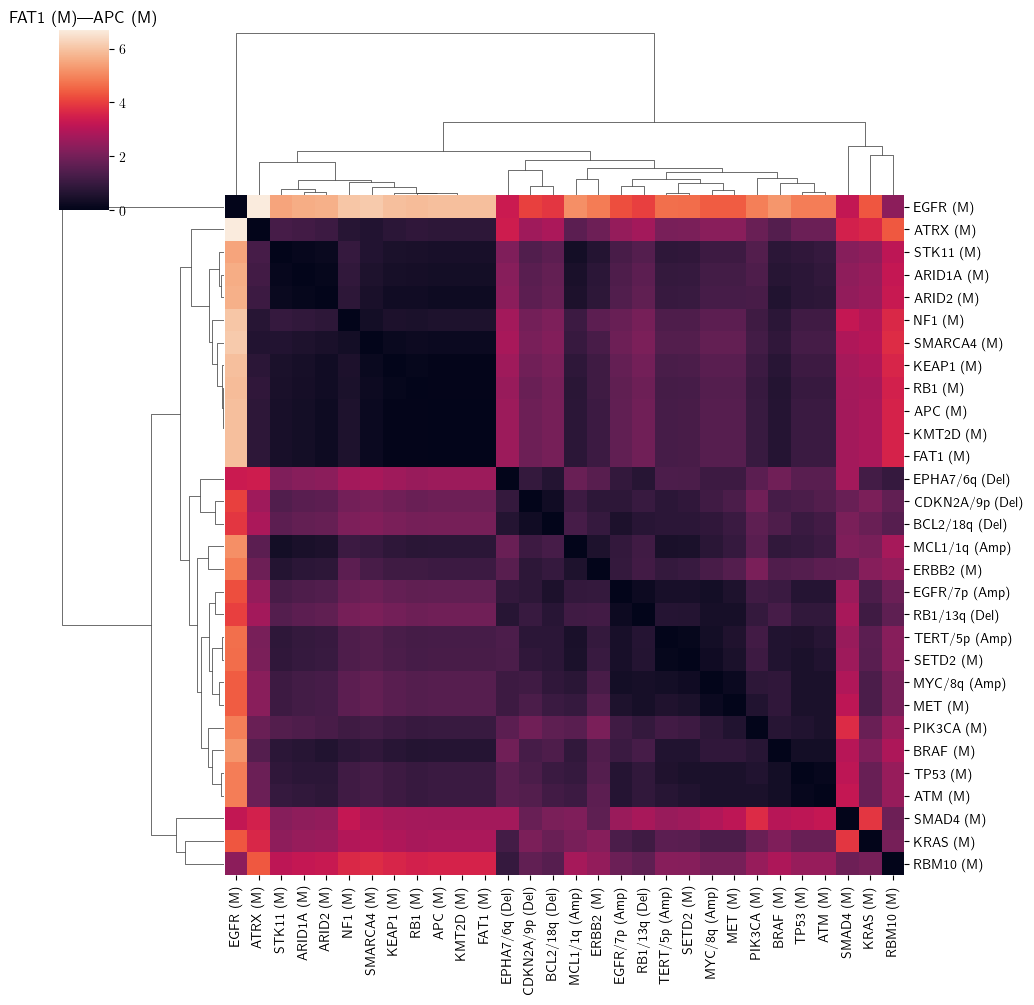

In [9]:
test_event_sets_dict={
    'LUAD':[
        ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)'],
        ['EGFR (M)', 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 
        ['STK11 (M)', 'KEAP1 (M)'] ,
        ['FAT1 (M)','APC (M)']

        ],


    'COAD':[
        ['TGFBR2 (M)', 'SMAD4 (M)'],
        ['KRAS (M)', 'BRAF (M)'],                                   #pathway MAPK/ERK
        ['FAT1 (M)', 'APC (M)','CTNNB1 (M)', 'AMER1 (M)'],          #pathway Wnt beta
        ['ARID1A (M)','KMT2D (M)','KMT2C (M)'] ,                    #chromatin remodeling
        ['ATM (M)', 'TP53 (M)'],                                    #dna damage response
    ],

        'AVG_NORM_ANALYSIS':[               #done on LUAD dataset (many test event sets to get a good average of MHN norms)
        ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)'],
        ['EGFR (M)', 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 
        ['STK11 (M)', 'KEAP1 (M)'] ,
        [ 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 
        ['STK11 (M)', 'KEAP1 (M)','KRAS (M)'],
        ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','STK11 (M)', 'KEAP1 (M)'],
        ['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)', 'PIK3CA (M)'],
        ['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)'],
        ['ATRX (M)', 'SETD2 (M)','BCL2/18q (Del)'],
        ['SMAD4 (M)', 'PIK3CA (M)','EGFR (M)'],
        ['SMAD4 (M)', 'PIK3CA (M)','MET (M)'],
        ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','ATRX (M)']
    ],

}


test_event_sets=test_event_sets_dict[dat_index]
dist_measurers=[]

#output test event sets in form that is usable in LaTEX
for tes in test_event_sets:
    print("\{\\text{"+', '.join(tes)+"}\}")



#cp.FORCE_EXECUTE_COMPUTATIONS=True

for test_event_set in test_event_sets:
    dist_measurers.append(edm.getDistMeasurer(data_input, events=events, test_event_set=test_event_set, extended_event_domain=True))

for test_event_set, dist_m in zip(test_event_sets,dist_measurers):
    sns.clustermap(dist_m._dist_mat, xticklabels=True, yticklabels=True)
    plt.title('---'.join(test_event_set),loc='center')
    plt.show()

We now combine all distance matrices to a single one using an arithmetic mean.
It needs to be taken into account that event pairs might appear in different numbers of distance matrices (depends on the choice of test event sets). We keep track of this in the matrix *count_dist*, which will act as the denominator when computing the arithmetic mean.

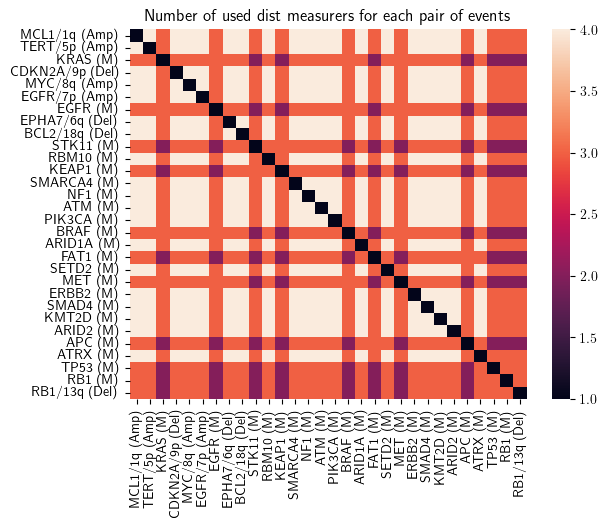

C:\Users\michi\AppData\Local\Temp\ipykernel_53212\3961632681.py:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')


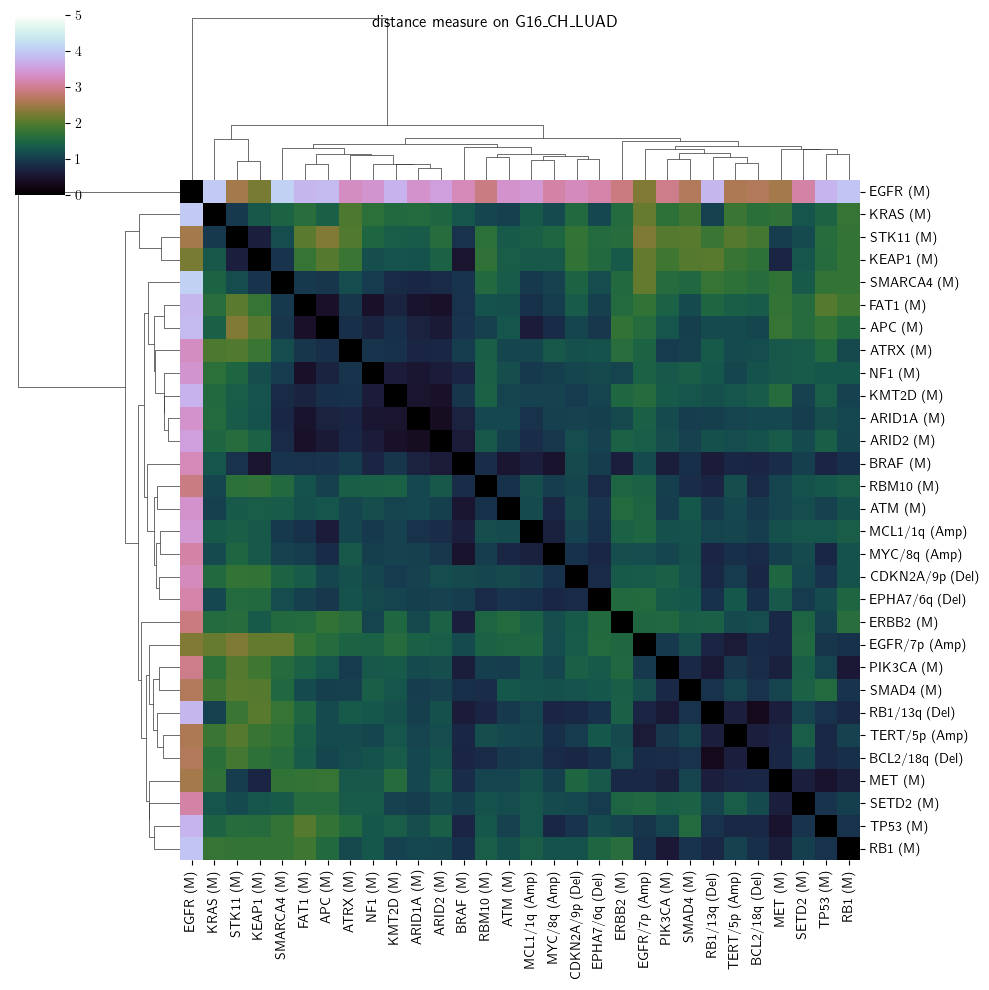

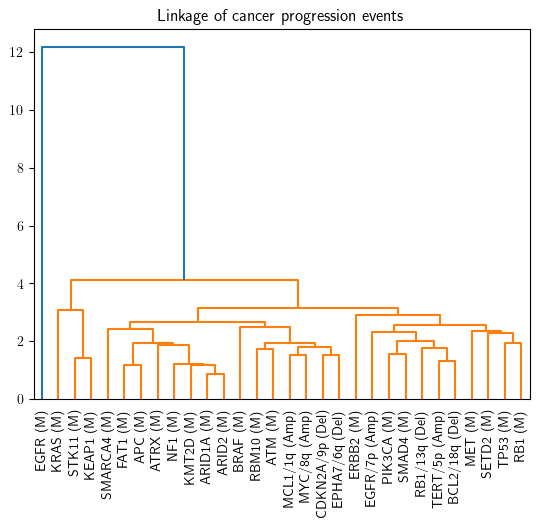

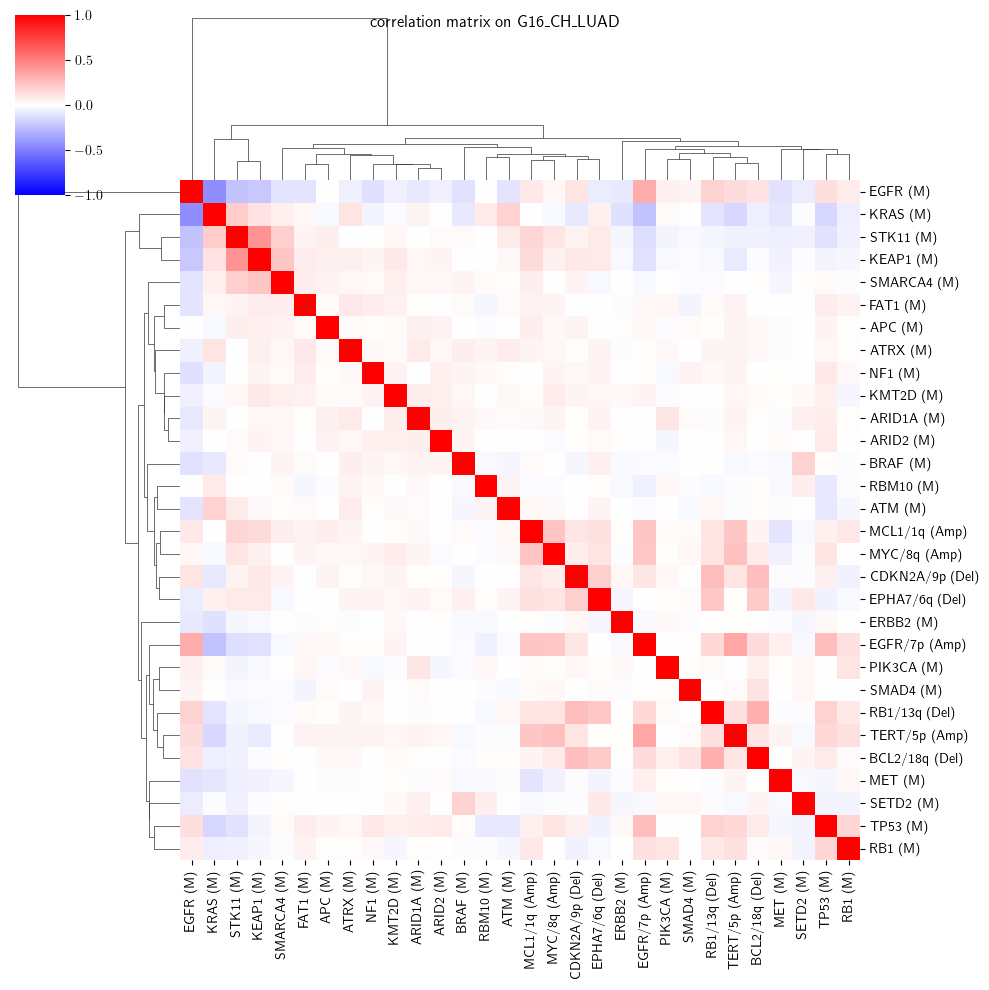

In [10]:
import scipy.cluster


sum_dist=dist_measurers[0]._dist_mat*0
count_dist=dist_measurers[0]._dist_mat*0



#combine all distance matrices to a single one (arithmetic mean)
#We need to take into account that event pairs might appear in different numbers of distance matrices (-> count_dist)
for test_event_set,dist_m in zip(test_event_sets,dist_measurers):

    dist_mat=dist_m._dist_mat.copy()

    dist_mat.sort_index(axis=0, inplace=True)
    dist_mat.sort_index(axis=1, inplace=True)
    dist_mat.loc[:,test_event_set]=0
    dist_mat.loc[test_event_set,:]=0

    norm_c=len(test_event_set)      #normalization factor as discussed in section 2.6 of the thesis

    norm_dist=dist_mat*(1/norm_c)
    sum_dist+=norm_dist

    count_inc=dist_mat*0+1
    count_inc.loc[:,test_event_set]=0
    count_inc.loc[test_event_set,:]=0
    count_dist += count_inc
    
np.fill_diagonal(count_dist.values, 1)



sns.heatmap(count_dist, xticklabels=True, yticklabels=True)
plt.title('Number of used dist measurers for each pair of events')
plt.show()

mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')
events_abc=list(count_dist.index)


sns.clustermap(sum_dist/(count_dist), xticklabels=True, yticklabels=True, row_linkage=mean_linkage, col_linkage=mean_linkage,cmap='cubehelix', vmax=5).figure.suptitle(f"distance measure on {file_names_dict[dat_index][0:11]} ")
plt.show()

scipy.cluster.hierarchy.dendrogram(mean_linkage, labels=events_abc, leaf_rotation=90)
plt.title('Linkage of cancer progression events')
plt.show()

cov_mat=data_input[events_abc].corr()
sns.clustermap(cov_mat,  cmap='bwr', vmax=1, vmin=-1,xticklabels=True, yticklabels=True, row_linkage=mean_linkage, col_linkage=mean_linkage).figure.suptitle(f"correlation matrix on {file_names_dict[dat_index][0:11]} ")
plt.show()


The following section is most relevant for the case *dat_index='AVG_NORM_ANALYSIS'*.
For each test event set $T$ we compute all symmetrized distances of $\theta_{T,e}$ to $\theta_{T,null}$ and plot them grouped by the size of the test event set $|T|$.

When we take into account enough test event sets, we discover a linear relationship, which justifies our normalization procedure in section 2.6 of the thesis.

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


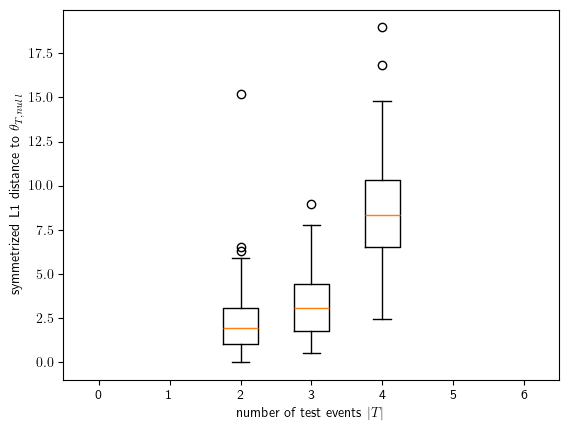

In [ ]:
#plot average norm for different sizes of MHN
import cmhn_distances

plt.rcParams['text.usetex'] = True

mhn_norms={ }
mhn_norm_points=[]
mhn_norm_avgs=[]
for i in range(7): mhn_norms[i]=[]
for tes, dist_m in zip(test_event_sets, dist_measurers):
    n_tes=len(tes)
    for ev in events:
        ev_mhn_norm=cmhn_distances.offdiag_l1_sym(dist_m._mhns[ev], dist_m._null_mhn)

        if not ev in tes:
            mhn_norms[n_tes].append(ev_mhn_norm)
            mhn_norm_points.append((n_tes, ev_mhn_norm))
            

for n_tes in mhn_norms:
    mhn_norm_avgs.append((n_tes, np.average(mhn_norms[n_tes])))


plt.boxplot(mhn_norms.values(), orientation='vertical')
plt.xticks(range(1, len(mhn_norms.keys()) + 1), mhn_norms.keys())
plt.xlabel('number of test events $|T|$')
plt.ylabel("symmetrized L1 distance to $\\theta_{T,\\mathit{null}}$")
plt.ylim(bottom=-1)
if dat_index == 'AVG_NORM_ANALYSIS':
    plt.savefig(fname='result_plots/mhn_norms_plot.png',dpi=600)
plt.show()



Plot all MHNs for all test event sets and selected cluster events

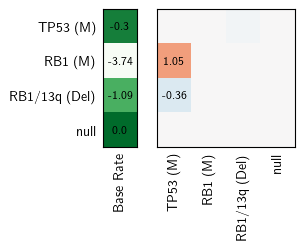

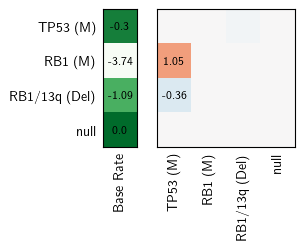

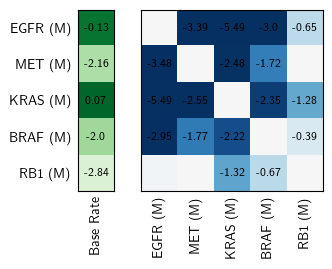

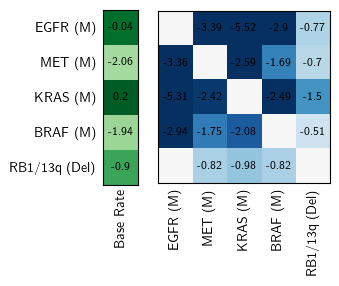

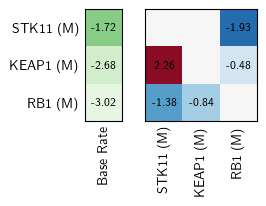

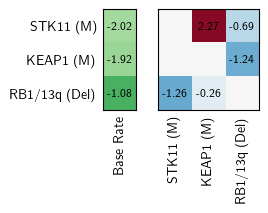

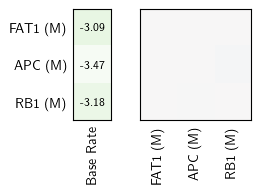

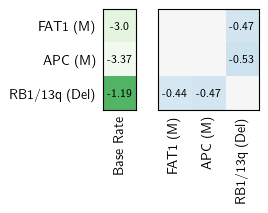

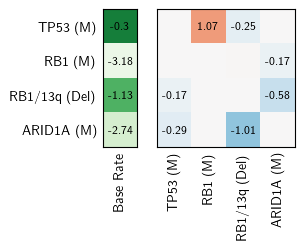

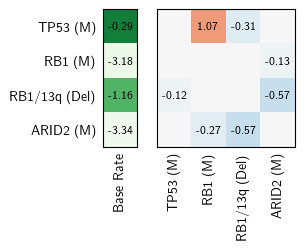

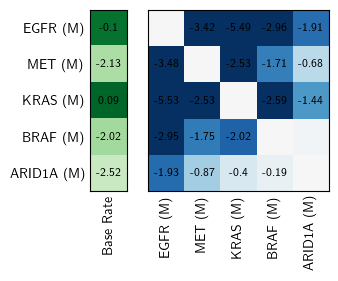

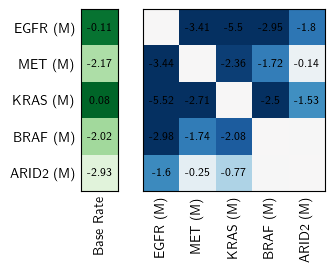

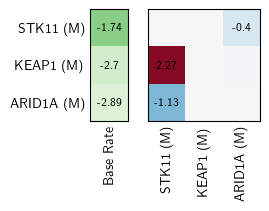

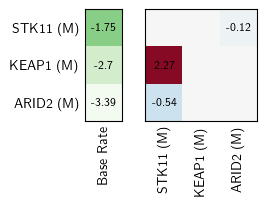

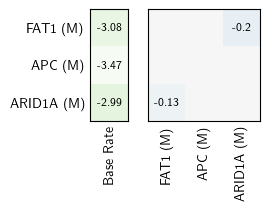

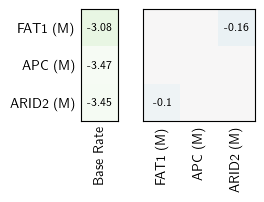

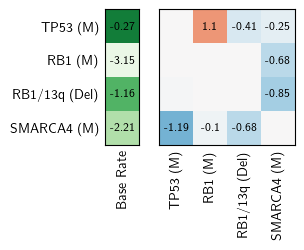

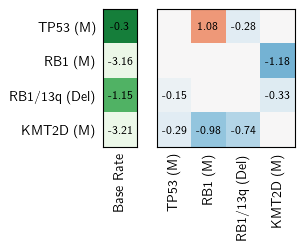

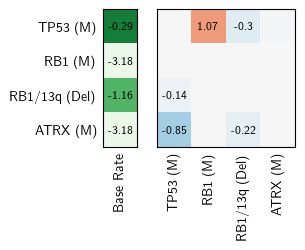

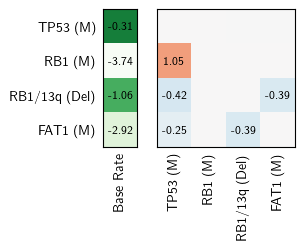

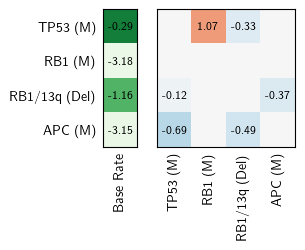

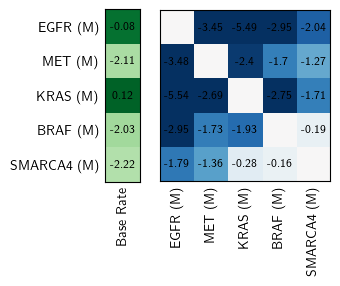

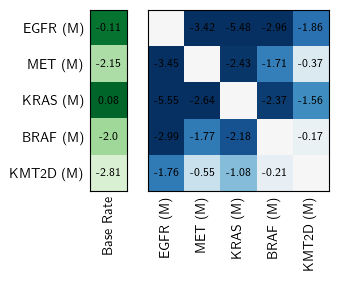

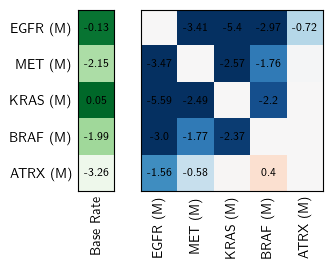

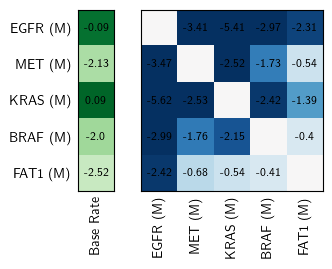

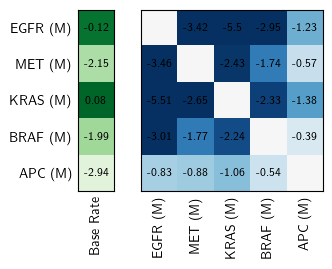

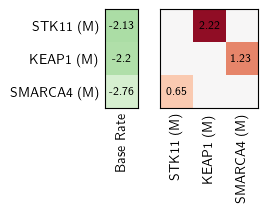

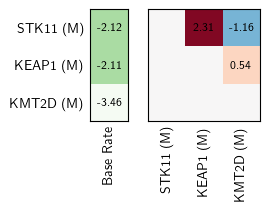

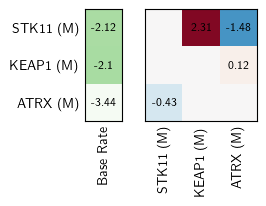

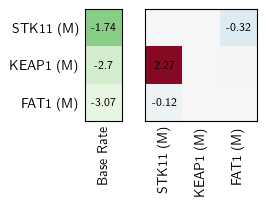

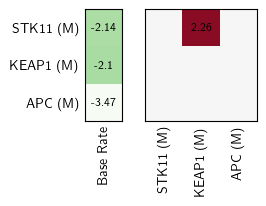

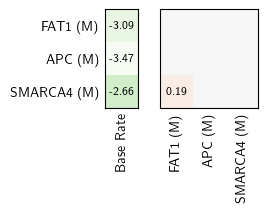

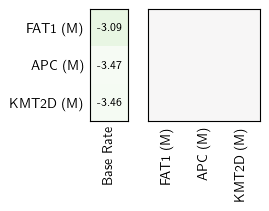

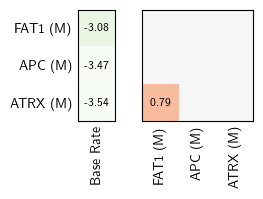

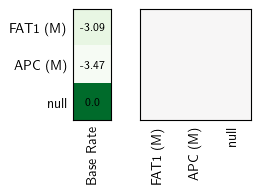

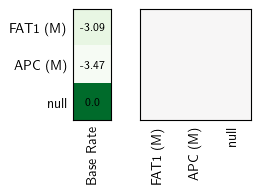

In [12]:
cluster_event_set_dict={
    'LUAD':[
        ['RB1 (M)', 'RB1/13q (Del)'],
        ['ARID1A (M)','ARID2 (M)'],
        ['SMARCA4 (M)','KMT2D (M)','ATRX (M)','FAT1 (M)','APC (M)']
    ]

,
    
    
    'COAD':[
    #['PIK3CA (M)','FBXW7 (M)','SOX9 (M)'],
    # ['BRAF (M)','AMER1 (M)'],['CREBBP (M)','B2M (M)'], 
    #['AMER1 (M)', 'BRAF (M)'],
    #['CREBBP (M)', 'B2M (M)'],
    ['KMT2D (M)', 'ARID1A (M)','KMT2C (M)','B2M (M)']]

,

'AVG_NORM_ANALYSIS':[]
}


cluster_event_sets=cluster_event_set_dict[dat_index]

for cluster_events in cluster_event_sets:
    for dist_measurer in dist_measurers:
        for ev in cluster_events:
            #mytools.plotMHNgroup([dist_m._mhns[ev]], identifier=dat_index)
            dist_measurer._mhns[ev].plot(colorbar=False)
            plt.show()